In [1]:
%load_ext autoreload
%autoreload 2

# Logistic Regression - `Titanic` Dataset

## Load Dataset

In [2]:
path = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Classification/data/titanic_train.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv(path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data quality

In [7]:
df.isnull().sum()/df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Drop columns

In [8]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(col_to_drop, axis=1, inplace=True)

### Data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int', errors='ignore')  # cannot convert NaN to int
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.9 KB


#### Describe numerical features

In [12]:
df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### Describe categorical features

In [13]:
df.describe(include='category')

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


## Train-Test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,
                                    test_size=0.2, 
                                    shuffle=True,
                                    random_state=42,
                                    stratify=df['Survived'])

## EDA

#### Age distribution

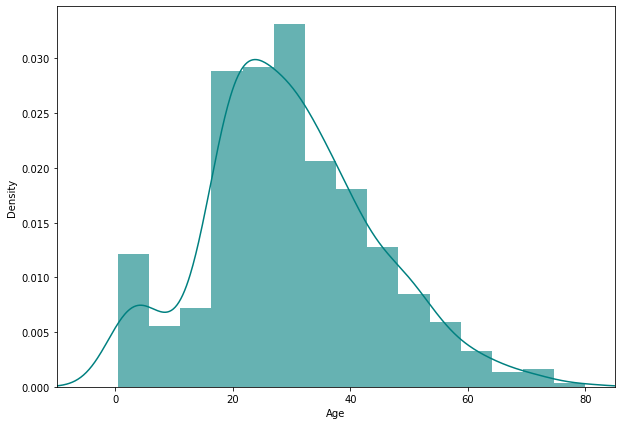

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = X_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
X_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### Embarked distribution

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


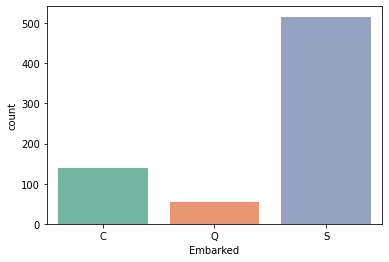

In [16]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=X_train, palette='Set2')
plt.show()

In [17]:
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,1,3,male,NaN,0,0,56.4958,S
481,0,2,male,NaN,0,0,0.0000,S
527,0,1,male,NaN,0,0,221.7792,S
855,1,3,female,18.0,0,1,9.3500,S
801,1,2,female,31.0,1,1,26.2500,S
...,...,...,...,...,...,...,...,...
359,1,3,female,NaN,0,0,7.8792,Q
258,1,1,female,35.0,0,0,512.3292,C
736,0,3,female,48.0,1,3,34.3750,S
462,0,1,male,47.0,0,0,38.5000,S


#### Age and Sex distribution

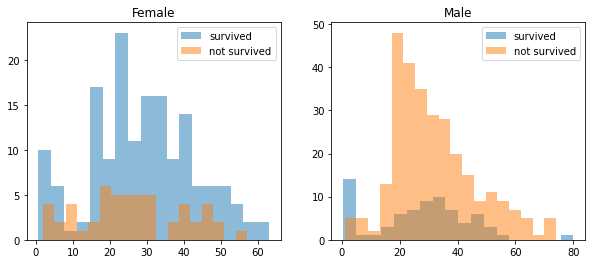

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = X_train[X_train['Sex']=='female']
men = X_train[X_train['Sex']=='male']

ax[0].hist(women[women['Survived']==1]['Age'].dropna(), bins=18, label='survived', alpha=0.5)
ax[0].hist(women[women['Survived']==0]['Age'].dropna(), bins=18, label='not survived', alpha=0.5)
ax[0].set_title('Female')
ax[0].legend()

ax[1].hist(men[men['Survived']==1]['Age'].dropna(), bins=18, label='survived', alpha=0.5)
ax[1].hist(men[men['Survived']==0]['Age'].dropna(), bins=18, label='not survived', alpha=0.5)
ax[1].set_title('Male')
ax[1].legend()


## Select target variable

In [19]:
y_train = X_train.pop('Survived')
y_test = X_test.pop('Survived')

## Feature Engineering

In [20]:
X_train['not_alone'] = X_train[['SibSp', 'Parch']].sum(axis=1).astype(bool).astype(int)
X_train['not_alone']

692    0
481    0
527    0
855    1
801    1
      ..
359    0
258    0
736    1
462    0
507    0
Name: not_alone, Length: 712, dtype: int64

In [21]:
X_train['not_alone'] = X_train['not_alone'].astype('category')

## Train set pre-processing

In [22]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,not_alone
692,3,male,NaN,0,0,56.4958,S,0
481,2,male,NaN,0,0,0.0000,S,0
527,1,male,NaN,0,0,221.7792,S,0
855,3,female,18.0,0,1,9.3500,S,1
801,2,female,31.0,1,1,26.2500,S,1


In [23]:
num_attr = X_train.select_dtypes(include='number').columns

In [24]:
num_attr

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Fill NA - continuouse variable

In [25]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
imputer_num.fit(X_train[num_attr])

SimpleImputer(strategy='median')

In [26]:
imputer_num.statistics_

array([28.5   ,  0.    ,  0.    , 14.4542])

In [27]:
X_train_imputer_num = imputer_num.transform(X_train[num_attr])
X_train_imputer_num

array([[ 28.5   ,   0.    ,   0.    ,  56.4958],
       [ 28.5   ,   0.    ,   0.    ,   0.    ],
       [ 28.5   ,   0.    ,   0.    , 221.7792],
       ...,
       [ 48.    ,   1.    ,   3.    ,  34.375 ],
       [ 47.    ,   0.    ,   0.    ,  38.5   ],
       [ 28.5   ,   0.    ,   0.    ,  26.55  ]])

#### Get DataFrame

In [28]:
X_train_num = pd.DataFrame(X_train_imputer_num, columns=num_attr)
X_train_num.head()

,Age,SibSp,Parch,Fare
0,28.5,0.0,0.0,56.4958
1,28.5,0.0,0.0,0.0000
2,28.5,0.0,0.0,221.7792
3,18.0,0.0,1.0,9.3500
4,31.0,1.0,1.0,26.2500


### Fill NA - categorical variables

In [29]:
cat_attr = X_train.select_dtypes(exclude='number').columns
cat_attr

Index(['Pclass', 'Sex', 'Embarked', 'not_alone'], dtype='object')

In [30]:
imputer_cat = SimpleImputer(strategy='most_frequent')

X_train_imputer_cat = imputer_cat.fit_transform(X_train[cat_attr])
X_train_imputer_cat

array([[3, 'male', 'S', 0],
       [2, 'male', 'S', 0],
       [1, 'male', 'S', 0],
       ...,
       [3, 'female', 'S', 1],
       [1, 'male', 'S', 0],
       [1, 'male', 'S', 0]], dtype=object)

#### Get DataFrame

In [31]:
X_train_cat = pd.DataFrame(X_train_imputer_cat, columns=cat_attr)
X_train_cat.head()

,Pclass,Sex,Embarked,not_alone
0,3,male,S,0
1,2,male,S,0
2,1,male,S,0
3,3,female,S,1
4,2,female,S,1


### Concatenate

In [32]:
X_train_imputer = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_imputer.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,not_alone
0,28.5,0.0,0.0,56.4958,3,male,S,0
1,28.5,0.0,0.0,0.0000,2,male,S,0
2,28.5,0.0,0.0,221.7792,1,male,S,0
3,18.0,0.0,1.0,9.3500,3,female,S,1
4,31.0,1.0,1.0,26.2500,2,female,S,1


### Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_imputer[num_attr])
X_train_scaler

array([[-0.08113533, -0.46508428, -0.46618317,  0.5138115 ],
       [-0.08113533, -0.46508428, -0.46618317, -0.66256323],
       [-0.08113533, -0.46508428, -0.46618317,  3.95539858],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343,  0.0532047 ],
       [ 1.34017889, -0.46508428, -0.46618317,  0.13909685],
       [-0.08113533, -0.46508428, -0.46618317, -0.10973011]])

In [34]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=num_attr)
X_train_scaler.head()

,Age,SibSp,Parch,Fare
0,-0.081135,-0.465084,-0.466183,0.513812
1,-0.081135,-0.465084,-0.466183,-0.662563
2,-0.081135,-0.465084,-0.466183,3.955399
3,-0.887827,-0.465084,0.727782,-0.467874
4,0.110934,0.478335,0.727782,-0.115977


### One-hot encoder

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X_train_ohe = ohe.fit_transform(X_train_imputer[cat_attr])
# X_train_ohe.todense()  
X_train_ohe

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

#### Get DataFrame

In [36]:
ohe.categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([0, 1], dtype=object)]

In [37]:
ohe_cols = [f'{i[0]}_{j}' for i in zip(cat_attr, ohe.categories_) for j in i[1]]
ohe_cols

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'not_alone_0',
 'not_alone_1']

In [38]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols)
X_train_ohe.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,not_alone_0,not_alone_1
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [39]:
X_train_tr = pd.concat([X_train_scaler, X_train_ohe], axis=1)
X_train_tr.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,not_alone_0,not_alone_1
0,-0.081135,-0.465084,-0.466183,0.513812,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.081135,-0.465084,-0.466183,-0.662563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.081135,-0.465084,-0.466183,3.955399,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.887827,-0.465084,0.727782,-0.467874,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.110934,0.478335,0.727782,-0.115977,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Fit Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
cls.fit(X_train_tr, y_train)

LogisticRegression()

In [42]:
# Return accuracy
cls.score(X_train_tr, y_train)

0.8019662921348315

## Validation

Teraz musimy wszystkie transformacje wykonać ponownie na datasecie testowym...

In [44]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
565,3,male,24.0,2,0,24.1500,S
160,3,male,44.0,0,1,16.1000,S
553,3,male,22.0,0,0,7.2250,C
860,3,male,41.0,2,0,14.1083,S
241,3,female,NaN,1,0,15.5000,Q


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 565 to 637
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    179 non-null    category
 1   Sex       179 non-null    category
 2   Age       139 non-null    float64 
 3   SibSp     179 non-null    int64   
 4   Parch     179 non-null    int64   
 5   Fare      179 non-null    float64 
 6   Embarked  179 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 7.9 KB


In [46]:
X_test['not_alone'] = X_test[['SibSp', 'Parch']].sum(axis=1).astype(bool).astype(int)
X_test['not_alone'] = X_test['not_alone'].astype('category')

In [47]:
X_test_imputer_num = imputer_num.transform(X_test[num_attr])
X_test_imputer_num = pd.DataFrame(X_test_imputer_num, columns=num_attr)

In [48]:
X_test_imputer_cat = imputer_cat.transform(X_test[cat_attr])
X_test_imputer_cat = pd.DataFrame(X_test_imputer_cat, columns=cat_attr)

In [49]:
X_test_scaler = scaler.transform(X_test_imputer_num)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_attr)
X_test_scaler.head()

,Age,SibSp,Parch,Fare
0,-0.426860,1.421753,-0.466183,-0.159704
1,1.109696,-0.465084,0.727782,-0.327324
2,-0.580516,-0.465084,-0.466183,-0.512122
3,0.879212,1.421753,-0.466183,-0.368795
4,-0.081135,0.478335,-0.466183,-0.339817


In [50]:
X_test_ohe = ohe.transform(X_test_imputer_cat)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols)
X_test_ohe.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,not_alone_0,not_alone_1
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
X_test_tr = pd.concat([X_test_scaler, X_test_ohe], axis=1)
X_test_tr.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,not_alone_0,not_alone_1
0,-0.426860,1.421753,-0.466183,-0.159704,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.109696,-0.465084,0.727782,-0.327324,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.580516,-0.465084,-0.466183,-0.512122,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.879212,1.421753,-0.466183,-0.368795,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.081135,0.478335,-0.466183,-0.339817,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


All steps:

```Python
X_test['not_alone'] = X_test[['SibSp', 'Parch']].sum(axis=1).astype(bool).astype(int)
X_test['not_alone'] = X_test['not_alone'].astype('category')

X_test_imputer_num = imputer_num.transform(X_test[num_attr])
X_test_imputer_num = pd.DataFrame(X_test_imputer_num, columns=num_attr)

X_test_imputer_cat = imputer_cat.transform(X_test[cat_attr])
X_test_imputer_cat = pd.DataFrame(X_test_imputer_cat, columns=cat_attr)

X_test_scaler = scaler.transform(X_test_imputer_num)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_attr)

X_test_ohe = ohe.transform(X_test_imputer_cat)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols)

X_test_tr = pd.concat([X_test_scaler, X_test_ohe], axis=1)
```

In [52]:
cls.score(X_test_tr, y_test)

0.8156424581005587

In [53]:
y_pred = cls.predict(X_test_tr)

In [54]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

### Confussion Matrix

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=cls.classes_)
cm

array([[99, 11],
       [22, 47]])

In [56]:
tn, fp, fn, tp = cm.ravel()

print(f"True negative: {tn}")
print(f"False positive: {fp}")
print(f"False negative: {fn}")
print(f"True positive: {tp}")

True negative: 99
False positive: 11
False negative: 22
True positive: 47


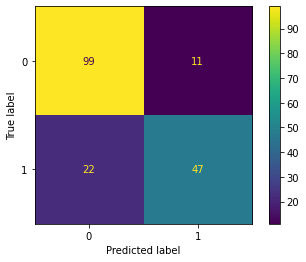

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=cls.classes_)
disp.plot()
plt.show()

[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

### accuracy

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8156424581005587

### racall

In [59]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.6811594202898551

### precission

In [60]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8103448275862069

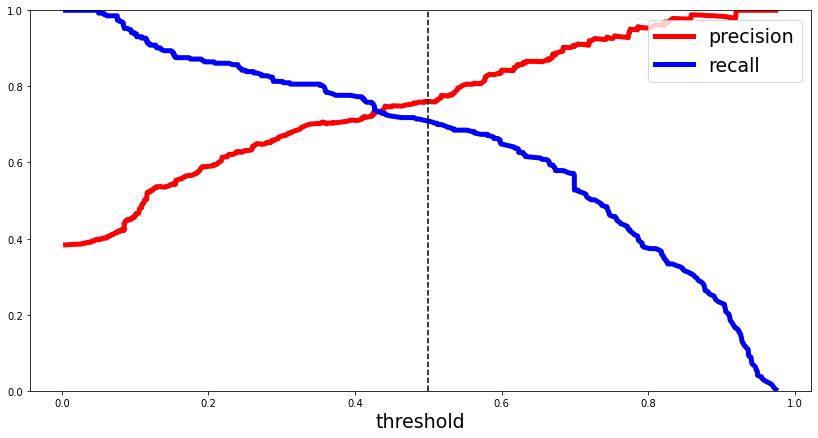

In [61]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = cls.predict_proba(X_train_tr)
y_scores = y_scores[:, 1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)


def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.axvline(x = 0.5, color = 'black', linestyle='--', label='threshold 0.5')
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

### $F_1$ score

In [62]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7401574803149606

### Calasyfication report

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



### ROC-AUC Curve

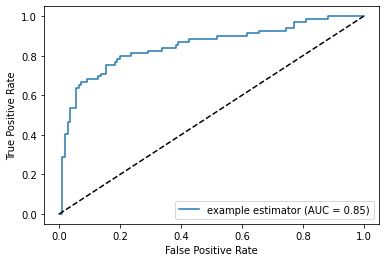

In [64]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay 

y_pred_proba = cls.predict_proba(X_test_tr)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)

## Pipeline

#### Custom Transformer

[Developing scikit-learn estimators](https://scikit-learn.org/dev/developers/develop.html)

[Creating custom scikit-learn Transformers](https://www.andrewvillazon.com/custom-scikit-learn-transformers/)

[Pipelines & Custom Transformers in scikit-learn](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156)

In [67]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances


class NotAlone(TransformerMixin, BaseEstimator):
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y=None):
        X = check_array(X, accept_sparse=True)

        self.n_features_ = X.shape[1]
        return self

    def transform(self, X):
        X = check_array(X, accept_sparse=True)
        return X.sum(axis=1).astype(bool).astype(int).reshape(-1, 1)

In [68]:
NotAlone().fit_transform(X_train[['SibSp', 'Parch']]).reshape(-1, 1)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [69]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns
not_alone_attr = ['SibSp', 'Parch']

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     ('standard_scaller', StandardScaler()),
    ]
)

cat_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(sparse=False)),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('engineering', NotAlone(), not_alone_attr),
     ('categorical', cat_pipeline, cat_attr)
    ]
)


In [71]:
cat_num_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard_scaller',
                                                  StandardScaler())]),
                                 Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('engineering', NotAlone(), ['SibSp', 'Parch']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(sparse=False))]),
                                 Index(['Pclass', 'Sex', 'Embarked', 'not_alone'], dtype='object'))])

In [72]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,not_alone
692,3,male,NaN,0,0,56.4958,S,0
481,2,male,NaN,0,0,0.0000,S,0
527,1,male,NaN,0,0,221.7792,S,0
855,3,female,18.0,0,1,9.3500,S,1
801,2,female,31.0,1,1,26.2500,S,1
...,...,...,...,...,...,...,...,...
359,3,female,NaN,0,0,7.8792,Q,0
258,1,female,35.0,0,0,512.3292,C,0
736,3,female,48.0,1,3,34.3750,S,1
462,1,male,47.0,0,0,38.5000,S,0


In [73]:
X_train_tr = cat_num_pipeline.fit_transform(X_train)
X_train_tr

array([[-0.08113533, -0.46508428, -0.46618317, ...,  1.        ,
         1.        ,  0.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  1.        ,
         1.        ,  0.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.34017889, -0.46508428, -0.46618317, ...,  1.        ,
         1.        ,  0.        ],
       [-0.08113533, -0.46508428, -0.46618317, ...,  1.        ,
         1.        ,  0.        ]])

In [74]:
pd.DataFrame(X_train_tr)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.081135,-0.465084,-0.466183,0.513812,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.081135,-0.465084,-0.466183,-0.662563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.081135,-0.465084,-0.466183,3.955399,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.887827,-0.465084,0.727782,-0.467874,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.110934,0.478335,0.727782,-0.115977,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.081135,-0.465084,-0.466183,-0.498500,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
708,0.418245,-0.465084,-0.466183,10.005329,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
709,1.417007,0.478335,3.115713,0.053205,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
710,1.340179,-0.465084,-0.466183,0.139097,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [75]:
cat_num_pipeline.transformers_[2][1]['ohe'].categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([0, 1], dtype=object)]

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
train_pipeline = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', LogisticRegression(penalty='l1', solver='liblinear'))
    ]
)

In [78]:
train_pipeline

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaller',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('engineering', NotAlone(),
                                                  ['SibSp', 'Parch']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Pclass', 'Sex', 'Embarked', 'not_alone'], dtype='object'))])),
                ('model',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [79]:
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaller',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('engineering', NotAlone(),
                                                  ['SibSp', 'Parch']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Pclass', 'Sex', 'Embarked', 'not_alone'], dtype='object'))])),
                ('model',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [80]:
y_pred = train_pipeline.predict(X_test)

### model details

In [82]:
model = train_pipeline['model']

In [83]:
model.coef_

array([[-0.46789813, -0.38730179, -0.15380253,  0.09452789,  0.1217567 ,
         0.92631873,  0.        , -1.11923956,  1.71009378, -0.84807781,
         0.        ,  0.23396577, -0.35568452, -0.28344801,  0.10122076]])

In [84]:
model.intercept_

array([0.])

## GridSearch

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = [
    {
        "cat_num_pipeline__numerical__imputer__strategy": ["mean", "median"],
        "cat_num_pipeline__categorical__ohe__drop": ["first", None],
        "model__C": [0.1, 1],
        "model": [LogisticRegression()]
    }
]

In [87]:
for i in train_pipeline.get_params().keys():
    print(i)

memory
steps
verbose
cat_num_pipeline
model
cat_num_pipeline__n_jobs
cat_num_pipeline__remainder
cat_num_pipeline__sparse_threshold
cat_num_pipeline__transformer_weights
cat_num_pipeline__transformers
cat_num_pipeline__verbose
cat_num_pipeline__verbose_feature_names_out
cat_num_pipeline__numerical
cat_num_pipeline__engineering
cat_num_pipeline__categorical
cat_num_pipeline__numerical__memory
cat_num_pipeline__numerical__steps
cat_num_pipeline__numerical__verbose
cat_num_pipeline__numerical__imputer
cat_num_pipeline__numerical__standard_scaller
cat_num_pipeline__numerical__imputer__add_indicator
cat_num_pipeline__numerical__imputer__copy
cat_num_pipeline__numerical__imputer__fill_value
cat_num_pipeline__numerical__imputer__missing_values
cat_num_pipeline__numerical__imputer__strategy
cat_num_pipeline__numerical__imputer__verbose
cat_num_pipeline__numerical__standard_scaller__copy
cat_num_pipeline__numerical__standard_scaller__with_mean
cat_num_pipeline__numerical__standard_scaller__with

In [88]:
grid_search = GridSearchCV(train_pipeline, param_grid, verbose=3, scoring = 'recall')

In [89]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.709 total time=   0.0s
[CV 2/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.491 total time=   0.0s
[CV 3/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.745 total time=   0.0s
[CV 4/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.704 total time=   0.0s
[CV 5/5] END cat_num_pipeline__categorical__ohe__drop=first, cat_num_pipeline__numerical__imputer__strategy=mean, model=LogisticRegression(), model__C=0.1;, score=0.667 total time=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard_scaller',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('engineering',
                                                                         NotAlone(),
                                                                         ['SibSp',
                                                                          'Parch']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Simp...
                                                                         Index(['Pclass', 'Sex', 'Embarked', 'not_alone'], dtype='object'))])),
                                       ('model',
                                        LogisticRegression(penalty='l1',
                                                           solver='liblinear'))]),
             param_grid=[{'cat_num_pipeline__categorical__ohe__drop': ['first',
                                                                       None],
                          'cat_num_pipeline__numerical__imputer__strategy': ['mean',
                                                                             'median'],
                          'model': [LogisticRegression(C=1)],
                          'model__C': [0.1, 1]}],
             scoring='recall', verbose=3)

In [90]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cat_num_pipeline__categorical__ohe__drop,param_cat_num_pipeline__numerical__imputer__strategy,param_model,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007544,0.001370,0.003218,0.000787,first,mean,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.709091,0.490909,0.745455,0.703704,0.666667,0.663165,0.089676,7
1,0.005513,0.000090,0.002272,0.000077,first,mean,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.727273,0.545455,0.745455,0.722222,0.740741,0.696229,0.075864,3
2,0.005310,0.000045,0.002180,0.000017,first,median,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.709091,0.490909,0.745455,0.703704,0.666667,0.663165,0.089676,7
3,0.005620,0.000150,0.002218,0.000029,first,median,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': '...,0.727273,0.545455,0.745455,0.722222,0.740741,0.696229,0.075864,3
4,0.005479,0.000242,0.002322,0.000189,None,mean,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.727273,0.527273,0.745455,0.703704,0.722222,0.685185,0.080068,5
5,0.005490,0.000129,0.002203,0.000058,None,mean,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.727273,0.545455,0.763636,0.722222,0.740741,0.699865,0.078525,1
6,0.005220,0.000142,0.002152,0.000004,None,median,LogisticRegression(C=1),0.1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.727273,0.509091,0.745455,0.703704,0.722222,0.681549,0.087249,6
7,0.005517,0.000113,0.002143,0.000007,None,median,LogisticRegression(C=1),1,{'cat_num_pipeline__categorical__ohe__drop': N...,0.727273,0.545455,0.763636,0.722222,0.740741,0.699865,0.078525,1


# SGD logistic regression

In [93]:
from sklearn.linear_model import SGDClassifier


sgd_train_pipeline = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', SGDClassifier(loss='log_loss'))
    ]
)

sgd_train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaller',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('engineering', NotAlone(),
                                                  ['SibSp', 'Parch']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Pclass', 'Sex', 'Embarked', 'not_alone'], dtype='object'))])),
                ('model', SGDClassifier(loss='log_loss'))])

# Multiclass Logistic Regression (One vs. Rest)

In [94]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
X = iris.data
y = iris.target

In [97]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<AxesSubplot:ylabel='count'>

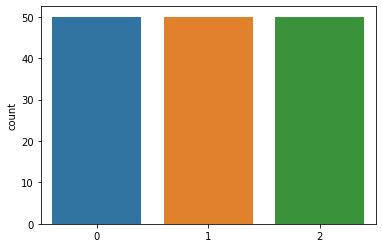

In [98]:
sns.countplot(x=y)

In [99]:
model = LogisticRegression(max_iter=10_000)
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [100]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [101]:
model.decision_function(X)

array([[  7.33596745,   3.36000939, -10.69597684],
       [  6.93693177,   3.41399207, -10.35092383],
       [  7.46687338,   3.26338734, -10.73026072],
       [  6.90907482,   3.20077002, -10.10984484],
       [  7.47508565,   3.2743722 , -10.74945785],
       [  6.62484416,   3.14083766,  -9.76568182],
       [  7.34307695,   3.03049228, -10.37356923],
       [  7.02987412,   3.31806171, -10.34793583],
       [  7.05200382,   3.17888361, -10.23088743],
       [  6.88994225,   3.45555149, -10.34549374],
       [  7.15067341,   3.43535341, -10.58602682],
       [  6.86289898,   3.19047685, -10.05337583],
       [  7.08725936,   3.45494311, -10.54220247],
       [  8.05420024,   3.24966401, -11.30386425],
       [  8.02658838,   3.61465405, -11.64124243],
       [  7.48492525,   3.18165189, -10.66657714],
       [  7.63166506,   3.22351625, -10.85518131],
       [  7.2280049 ,   3.26560074, -10.49360564],
       [  6.50895844,   3.42779871,  -9.93675715],
       [  7.26655914,   3.14839

In [102]:
model.predict_proba(X)

array([[9.81584172e-01, 1.84158131e-02, 1.44795025e-08],
       [9.71333444e-01, 2.86665262e-02, 3.01542166e-08],
       [9.85276612e-01, 1.47233753e-02, 1.23209231e-08],
       [9.76067705e-01, 2.39322554e-02, 3.96512649e-08],
       [9.85236338e-01, 1.47636504e-02, 1.19873102e-08],
       [9.70229192e-01, 2.97707337e-02, 7.38855220e-08],
       [9.86778263e-01, 1.32217168e-02, 1.99516078e-08],
       [9.76149516e-01, 2.38504566e-02, 2.76967860e-08],
       [9.79630140e-01, 2.03698298e-02, 3.05631306e-08],
       [9.68762184e-01, 3.12377842e-02, 3.16929329e-08],
       [9.76231050e-01, 2.37689305e-02, 1.93464630e-08],
       [9.75215025e-01, 2.47849313e-02, 4.38990966e-08],
       [9.74226963e-01, 2.57730157e-02, 2.14922632e-08],
       [9.91874068e-01, 8.12592788e-03, 3.88468623e-09],
       [9.88013722e-01, 1.19862751e-02, 2.83878555e-09],
       [9.86656234e-01, 1.33437527e-02, 1.29142306e-08],
       [9.87968802e-01, 1.20311884e-02, 9.24714923e-09],
       [9.81337552e-01, 1.86624